# Prueba Técnica

### Python

In [1]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import findspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import (mean, max, min)
findspark.init()

In [2]:
# Lectura de datos
data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/sales_success.csv', index_col=0)

In [3]:
# Visualización del conjunto
data.head()

,region,county,salesperson,calls,sales
0,North,Dallam,JE,35,23
1,North,Dallam,ZQ,49,13
2,North,Dallam,IJ,20,6
3,North,Hartley,WE,39,37
4,North,Hartley,PL,42,37


In [4]:
# Modificación de nombre de variables
data.columns = ['Region', 'County', 'Salesperson', 'Calls', 'Sales']

In [5]:
# Proporción de nulos
(data.isnull().sum() / len(data)) * 100

Region         0.0
County         0.0
Salesperson    0.0
Calls          0.0
Sales          0.0
dtype: float64

Tenemos 3 variables categóricas y 2 variables de tipo entero de 64 bits.

In [6]:
# Tipo de variables
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Region       51 non-null     object
 1   County       51 non-null     object
 2   Salesperson  51 non-null     object
 3   Calls        51 non-null     int64 
 4   Sales        51 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.4+ KB


Comprobar los estadísticos básicos de las variables numéricas resulta de interés puesto que la diferencia entre los valores de la media y de la mediana revelan si existen valores atípicos en las variables. Un valor llamativamente superior de la media respecto a la mediana podría indicar la existencia de valores atípicos muy grandes que arrastran la media hacia la derecha; un valor de la media llamativamente inferior a la mediana podría indicar la existencia de valores atípicos muy pequeños que arrastran la media hacia la izquierda. En este caso no existen grandes diferencias entre los valores de dichos estadísticos para las dos variables numéricas.

In [7]:
# Estadísticos básicos
data.describe()

,Calls,Sales
count,51.000000,51.000000
mean,34.117647,18.117647
std,9.684311,11.066430
min,20.000000,4.000000
25%,24.500000,8.000000
50%,35.000000,16.000000
75%,42.000000,24.500000
max,49.000000,45.000000


##### - Visualización gráfica

Vemos a continuación un conteo total de las variables categóricas 'Region', 'County' y 'Salesperson' en función de cada uno de los valores que obtienen las variables.

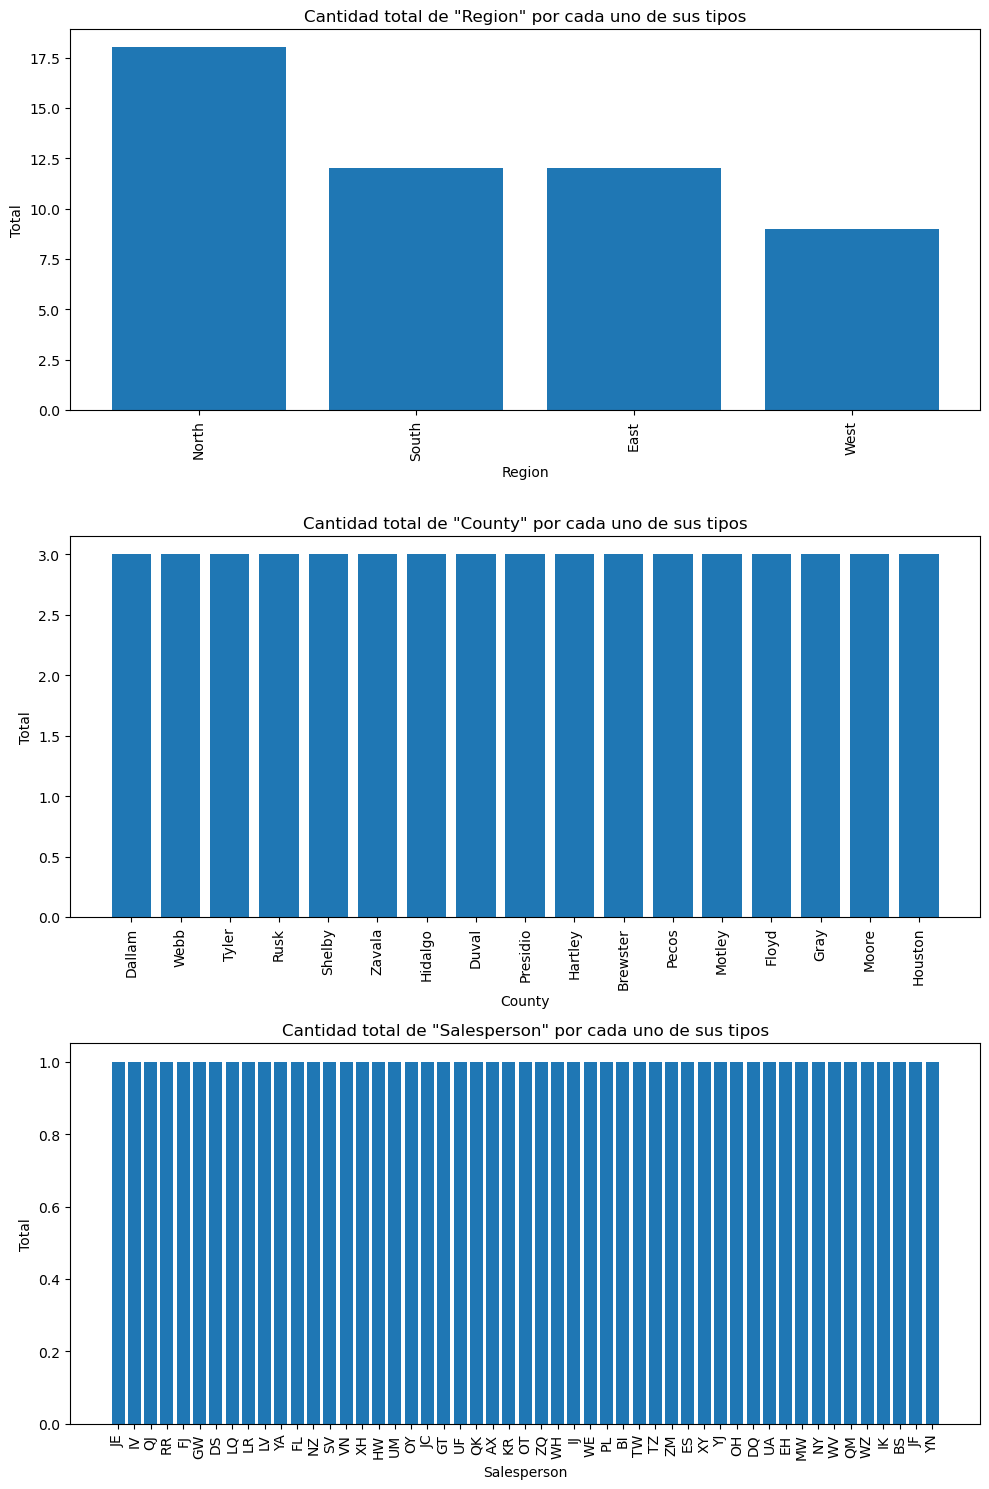

In [8]:
# Gráfico
data_cat = data.select_dtypes(include='object')
plt.figure(figsize=(10,15))
for i in range(len(data_cat.columns)):
    plt.subplot(len(data_cat.columns), 1, i+1)
    x_axis = data_cat[data_cat.columns[i]].value_counts().index.tolist()
    y_axis = data_cat[data_cat.columns[i]].value_counts().values.tolist()
    plt.bar(x=x_axis, height=y_axis)
    plt.xlabel(data_cat.columns[i])
    plt.xticks(rotation=90)
    plt.ylabel('Total')
    plt.title(f'Cantidad total de "{data_cat.columns[i]}" por cada uno de sus tipos')
plt.tight_layout()

Veamos las llamadas totales que se han registrado en cada región, en cada condado y por cada vendedor del producto.

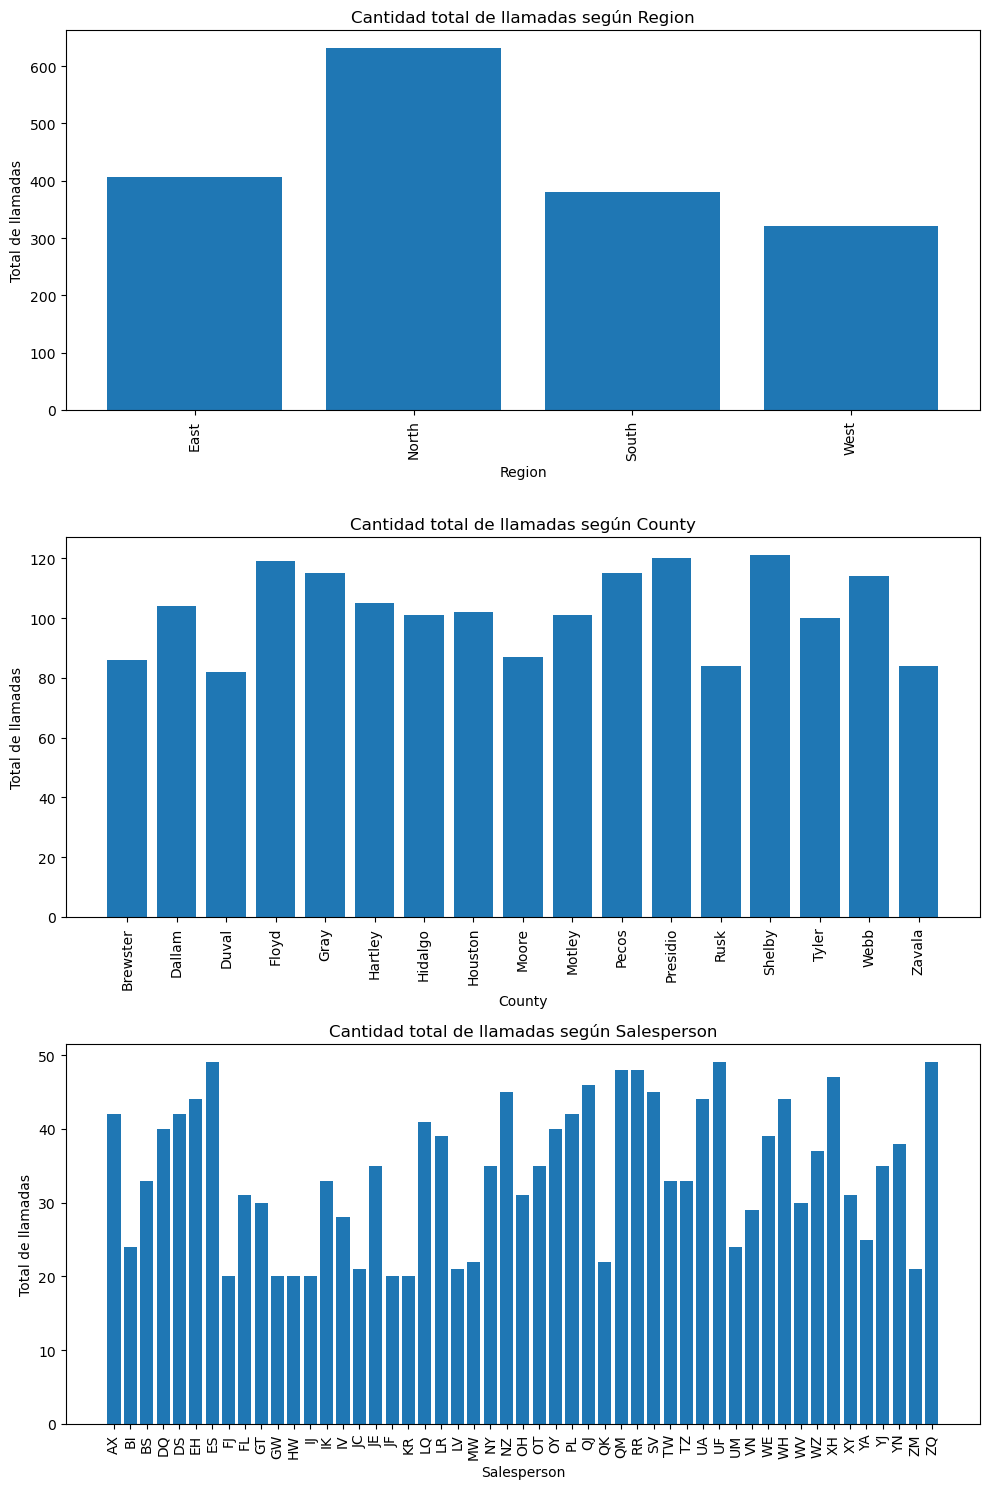

In [9]:
# Gráfico
data_cat["Calls"] = data["Calls"]
plt.figure(figsize=(10,15))
for i in range(len(data_cat.columns) - 1):
    plt.subplot(len(data_cat.columns) - 1, 1, i+1)
    to_plot = data_cat.groupby(by=data_cat.columns[i], as_index=False)['Calls'].sum()
    x_axis = to_plot[data_cat.columns[i]].tolist()
    y_axis = to_plot["Calls"].tolist()
    plt.bar(x=x_axis, height=y_axis)
    plt.xlabel(data_cat.columns[i])
    plt.xticks(rotation=90)
    plt.ylabel('Total de llamadas')
    plt.title(f'Cantidad total de llamadas según {data_cat.columns[i]}')
plt.tight_layout()

Veamos las ventas totales que se han realizado en cada región, en cada condado y por cada vendedor del producto.

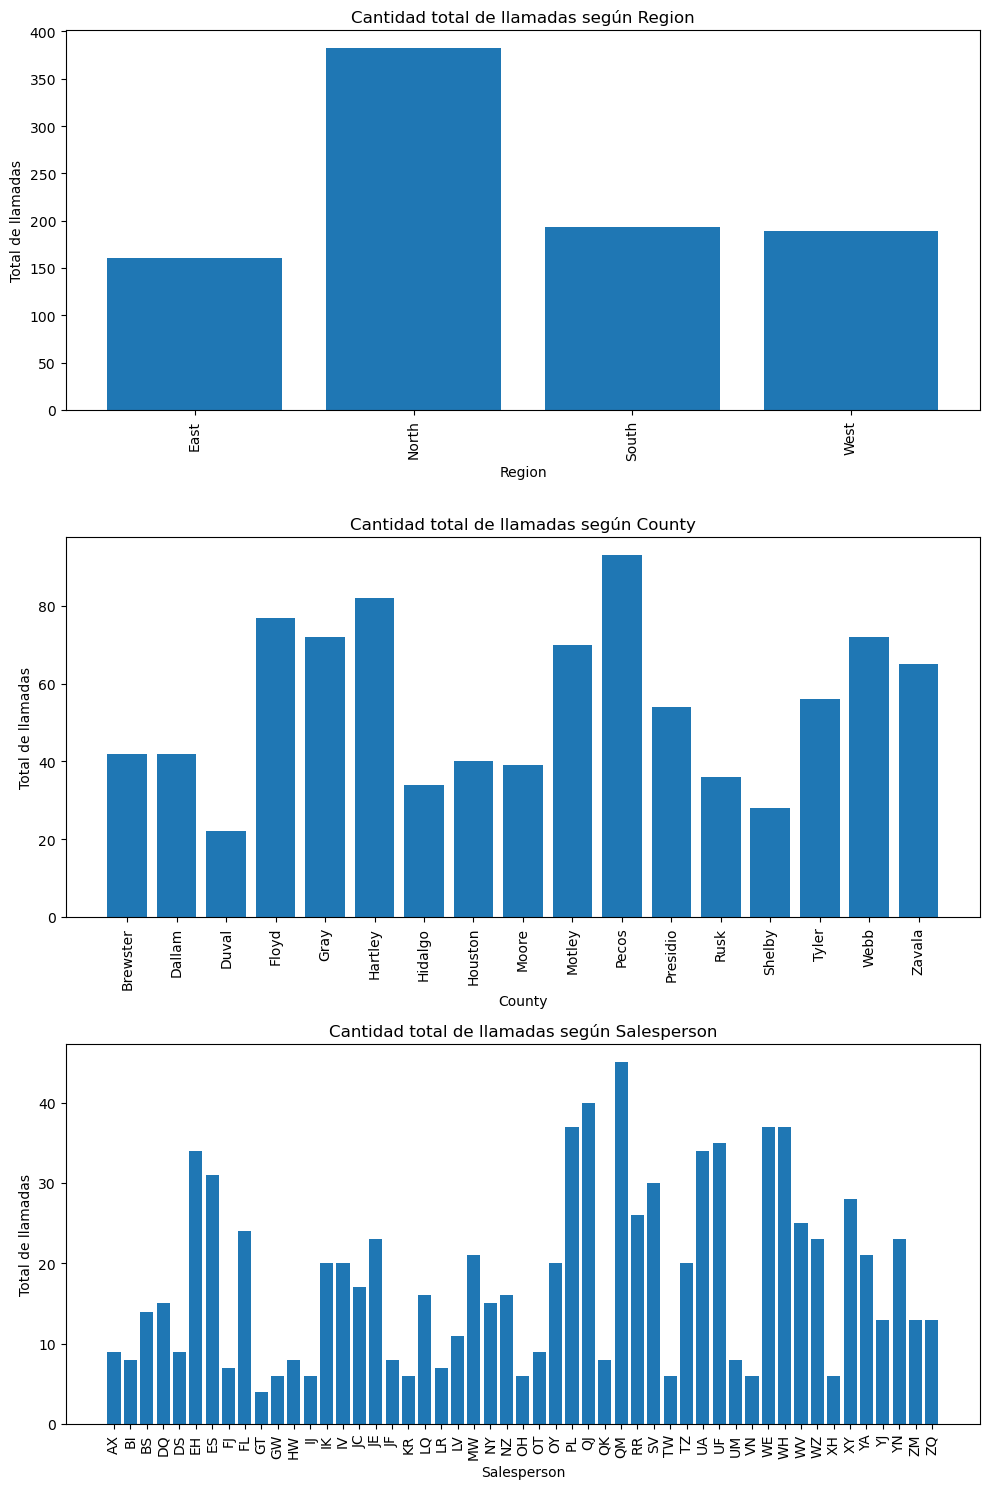

In [10]:
# Gráfico
data_cat = data_cat.drop(["Calls"], axis=1)
data_cat["Sales"] = data["Sales"]
plt.figure(figsize=(10,15))
for i in range(len(data_cat.columns) - 1):
    plt.subplot(len(data_cat.columns) - 1, 1, i+1)
    to_plot = data_cat.groupby(by=data_cat.columns[i], as_index=False)['Sales'].sum()
    x_axis = to_plot[data_cat.columns[i]].tolist()
    y_axis = to_plot["Sales"].tolist()
    plt.bar(x=x_axis, height=y_axis)
    plt.xlabel(data_cat.columns[i])
    plt.xticks(rotation=90)
    plt.ylabel('Total de llamadas')
    plt.title(f'Cantidad total de llamadas según {data_cat.columns[i]}')
plt.tight_layout()

### PySpark

En el caso de PySpark cabe señalar que no existe ninguna librería gráfica que nos permita realizar visualizaciones pero sí podemos desarrollar más consultas para conocer mejor los datos.

In [11]:
# SparkSession
spark = SparkSession.builder.appName('appName').getOrCreate()

In [12]:
# Conversión a DataFrame de Spark
data_spark = spark.createDataFrame(data)

In [13]:
# Visualización del conjunto
data_spark.show(5)

+------+-------+-----------+-----+-----+
|Region| County|Salesperson|Calls|Sales|
+------+-------+-----------+-----+-----+
| North| Dallam|         JE|   35|   23|
| North| Dallam|         ZQ|   49|   13|
| North| Dallam|         IJ|   20|    6|
| North|Hartley|         WE|   39|   37|
| North|Hartley|         PL|   42|   37|
+------+-------+-----------+-----+-----+
only showing top 5 rows



In [14]:
# Variables
data_spark.columns

['Region', 'County', 'Salesperson', 'Calls', 'Sales']

In [15]:
# Tipo de dato
data_spark.printSchema()

root
 |-- Region: string (nullable = true)
 |-- County: string (nullable = true)
 |-- Salesperson: string (nullable = true)
 |-- Calls: long (nullable = true)
 |-- Sales: long (nullable = true)



In [16]:
# Conteo de regiones
data_spark.groupBy(data_spark['Region']).count().show()

+------+-----+
|Region|count|
+------+-----+
| North|   18|
|  West|    9|
| South|   12|
|  East|   12|
+------+-----+



In [17]:
# Conteo de condados
data_spark.groupBy(data_spark['County']).count().show()

+--------+-----+
|  County|count|
+--------+-----+
|  Dallam|    3|
| Hartley|    3|
|    Gray|    3|
|   Moore|    3|
|   Floyd|    3|
|  Motley|    3|
|Brewster|    3|
|   Pecos|    3|
|    Webb|    3|
|Presidio|    3|
| Hidalgo|    3|
|   Duval|    3|
|  Zavala|    3|
|  Shelby|    3|
|   Tyler|    3|
| Houston|    3|
|    Rusk|    3|
+--------+-----+



In [18]:
# Conteo de vendedores
data_spark.groupBy(data_spark['Salesperson']).count().show()

+-----------+-----+
|Salesperson|count|
+-----------+-----+
|         PL|    1|
|         WE|    1|
|         IJ|    1|
|         ZQ|    1|
|         BI|    1|
|         JE|    1|
|         ZM|    1|
|         YJ|    1|
|         TW|    1|
|         XY|    1|
|         ES|    1|
|         TZ|    1|
|         UA|    1|
|         MW|    1|
|         OH|    1|
|         NY|    1|
|         WH|    1|
|         EH|    1|
|         BS|    1|
|         JF|    1|
+-----------+-----+
only showing top 20 rows



In [19]:
# Total de llamadas según región
data_spark.groupBy(data_spark["Region"]) \
          .sum().withColumnRenamed('sum(Calls)', 'TotalCalls') \
          .withColumnRenamed('sum(Sales)', 'TotalSales') \
          .show()

+------+----------+----------+
|Region|TotalCalls|TotalSales|
+------+----------+----------+
| North|       631|       382|
|  West|       321|       189|
| South|       381|       193|
|  East|       407|       160|
+------+----------+----------+



In [20]:
# Total de llamadas según condado
data_spark.groupBy(data_spark["County"]) \
          .sum().withColumnRenamed('sum(Calls)', 'TotalCalls') \
          .withColumnRenamed('sum(Sales)', 'TotalSales') \
          .show()

+--------+----------+----------+
|  County|TotalCalls|TotalSales|
+--------+----------+----------+
|  Dallam|       104|        42|
| Hartley|       105|        82|
|    Gray|       115|        72|
|   Moore|        87|        39|
|   Floyd|       119|        77|
|  Motley|       101|        70|
|Brewster|        86|        42|
|   Pecos|       115|        93|
|    Webb|       114|        72|
|Presidio|       120|        54|
| Hidalgo|       101|        34|
|   Duval|        82|        22|
|  Zavala|        84|        65|
|  Shelby|       121|        28|
|   Tyler|       100|        56|
| Houston|       102|        40|
|    Rusk|        84|        36|
+--------+----------+----------+



In [21]:
# Total de llamadas según vendedor
data_spark.groupBy(data_spark["Salesperson"]) \
          .sum().withColumnRenamed('sum(Calls)', 'TotalCalls') \
          .withColumnRenamed('sum(Sales)', 'TotalSales') \
          .show()

+-----------+----------+----------+
|Salesperson|TotalCalls|TotalSales|
+-----------+----------+----------+
|         PL|        42|        37|
|         WE|        39|        37|
|         IJ|        20|         6|
|         ZQ|        49|        13|
|         BI|        24|         8|
|         JE|        35|        23|
|         ZM|        21|        13|
|         YJ|        35|        13|
|         TW|        33|         6|
|         XY|        31|        28|
|         ES|        49|        31|
|         TZ|        33|        20|
|         UA|        44|        34|
|         MW|        22|        21|
|         OH|        31|         6|
|         NY|        35|        15|
|         WH|        44|        37|
|         EH|        44|        34|
|         BS|        33|        14|
|         JF|        20|         8|
+-----------+----------+----------+
only showing top 20 rows



##### - Media de lamadas y media de ventas

In [22]:
# Media de llamadas
data_spark.select(mean("Calls")).withColumnRenamed('avg(Calls)', 'MeanCalls').show()

+-----------------+
|        MeanCalls|
+-----------------+
|34.11764705882353|
+-----------------+



In [23]:
# Media de ventas
data_spark.select(mean("Sales")).withColumnRenamed('avg(Sales)', 'MeanSales').show()

+-----------------+
|        MeanSales|
+-----------------+
|18.11764705882353|
+-----------------+



##### - ¿Cuántas han sido el mínimo de ventas? ¿Y el máximo de ventas?

In [24]:
# Mínimo de ventas
data_spark.select(min("Sales")).withColumnRenamed('min(Sales)', 'MinSales').show()

+--------+
|MinSales|
+--------+
|       4|
+--------+



In [25]:
# Máximo de ventas
data_spark.select(max("Sales")).withColumnRenamed('max(Sales)', 'MaxSales').show()

+--------+
|MaxSales|
+--------+
|      45|
+--------+



#### - Total de observaciones con menos de 10 ventas

In [26]:
# Total con menos de 10 ventas
data_spark.filter('Sales < 10').count()

18